## TREND models based on Moving Average

"Rolling mean" shows how it is possible to create a simple model for describing a TS trend (see previous notebook)

Using "rolling" it is possible to implement a SIMPLE MOVING AVERAGE - not useful for forecating but (it could be) good enougt to give an idea of the evolution of a  TS.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
ts = pd.read_csv('./data2.csv', header=0, parse_dates=[0], dayfirst=True, index_col=0)
tsr = ts.resample(rule='20T').mean()

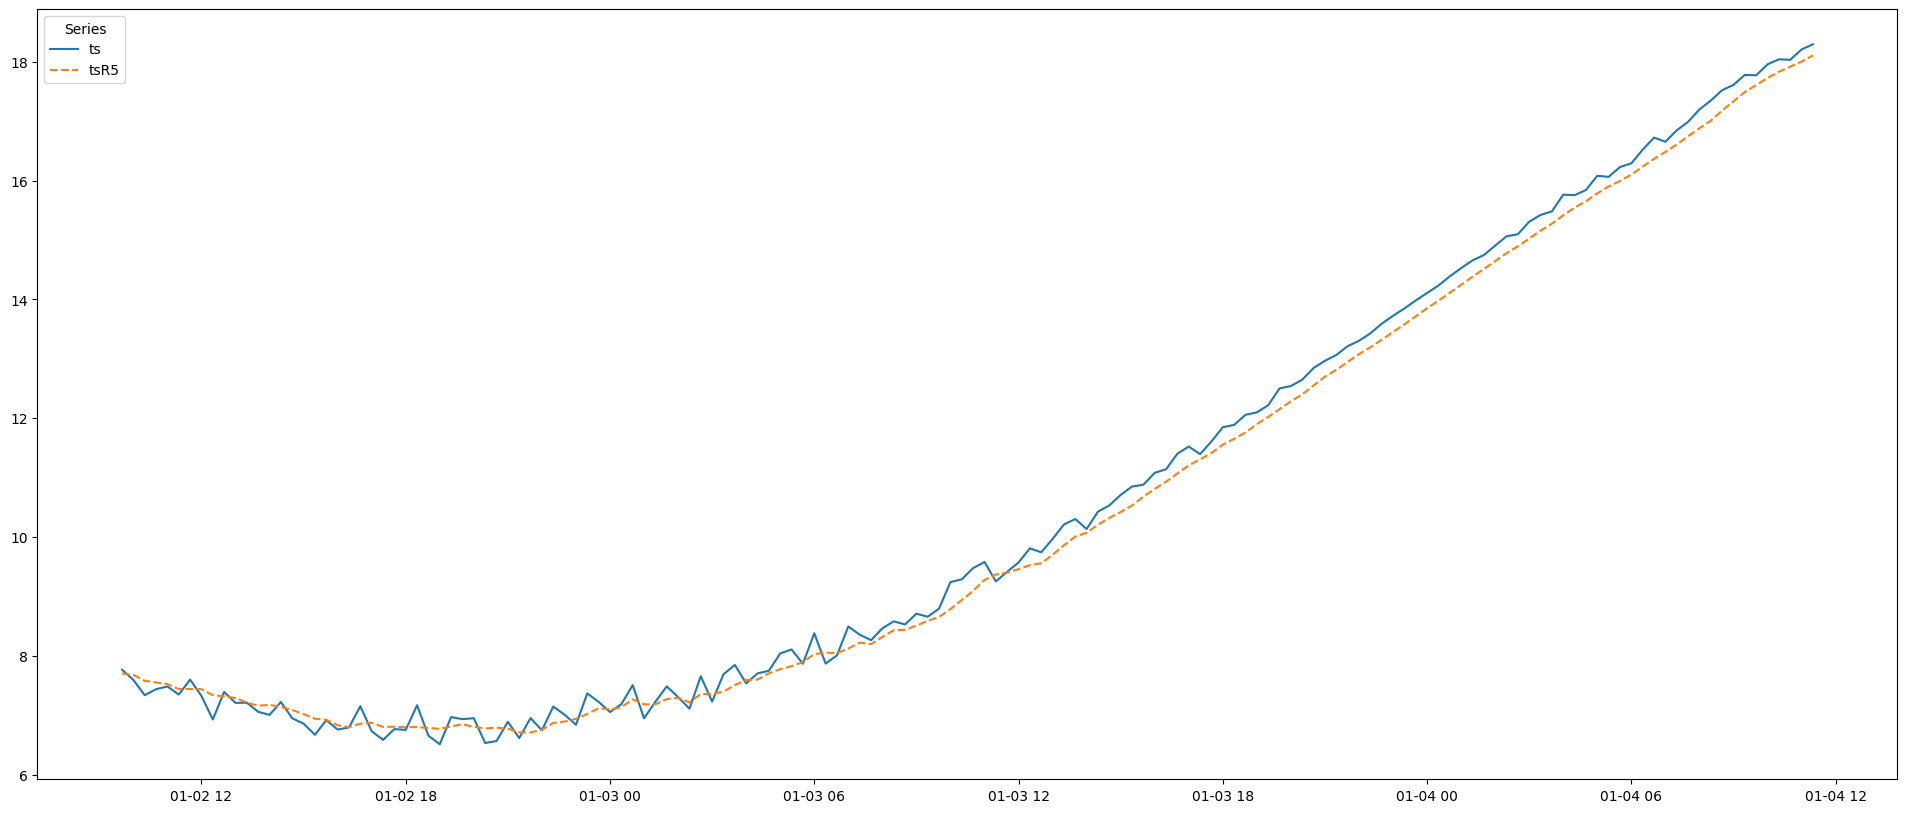

In [9]:
tsrR5 = tsr.rolling(window=5).mean()
plt.figure(figsize=(24,10), dpi=100)
plt.plot(tsr.iloc[100:250],"-",label = 'ts')
plt.plot(tsrR5.iloc[100:250], "--", label = 'tsR5')

#add legend
plt.legend(title='Series')

### EWMA (Exponentially Weighted Moving Averages)
Improvement of Simple Moving Average (SMA), where historycal values can influence significantly the current values.
EWMA puts more weight on values that occured more recently (name -> more weight to the recent values). 

The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size.

The formula for EWMA is:
### $y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$
where $w_i$ is function of the smoothing factor $\alpha$.

It is possible to pass <em>alpha</em> directly, but it is also possible to specify the <em>span</em> or <em>half-life</em> as a parameters:
* <strong>Span</strong> corresponds to what is commonly called an “N-samples EW moving average”.
* <strong>Half-life</strong> is the period of time for the exponential weight to reduce to one half.


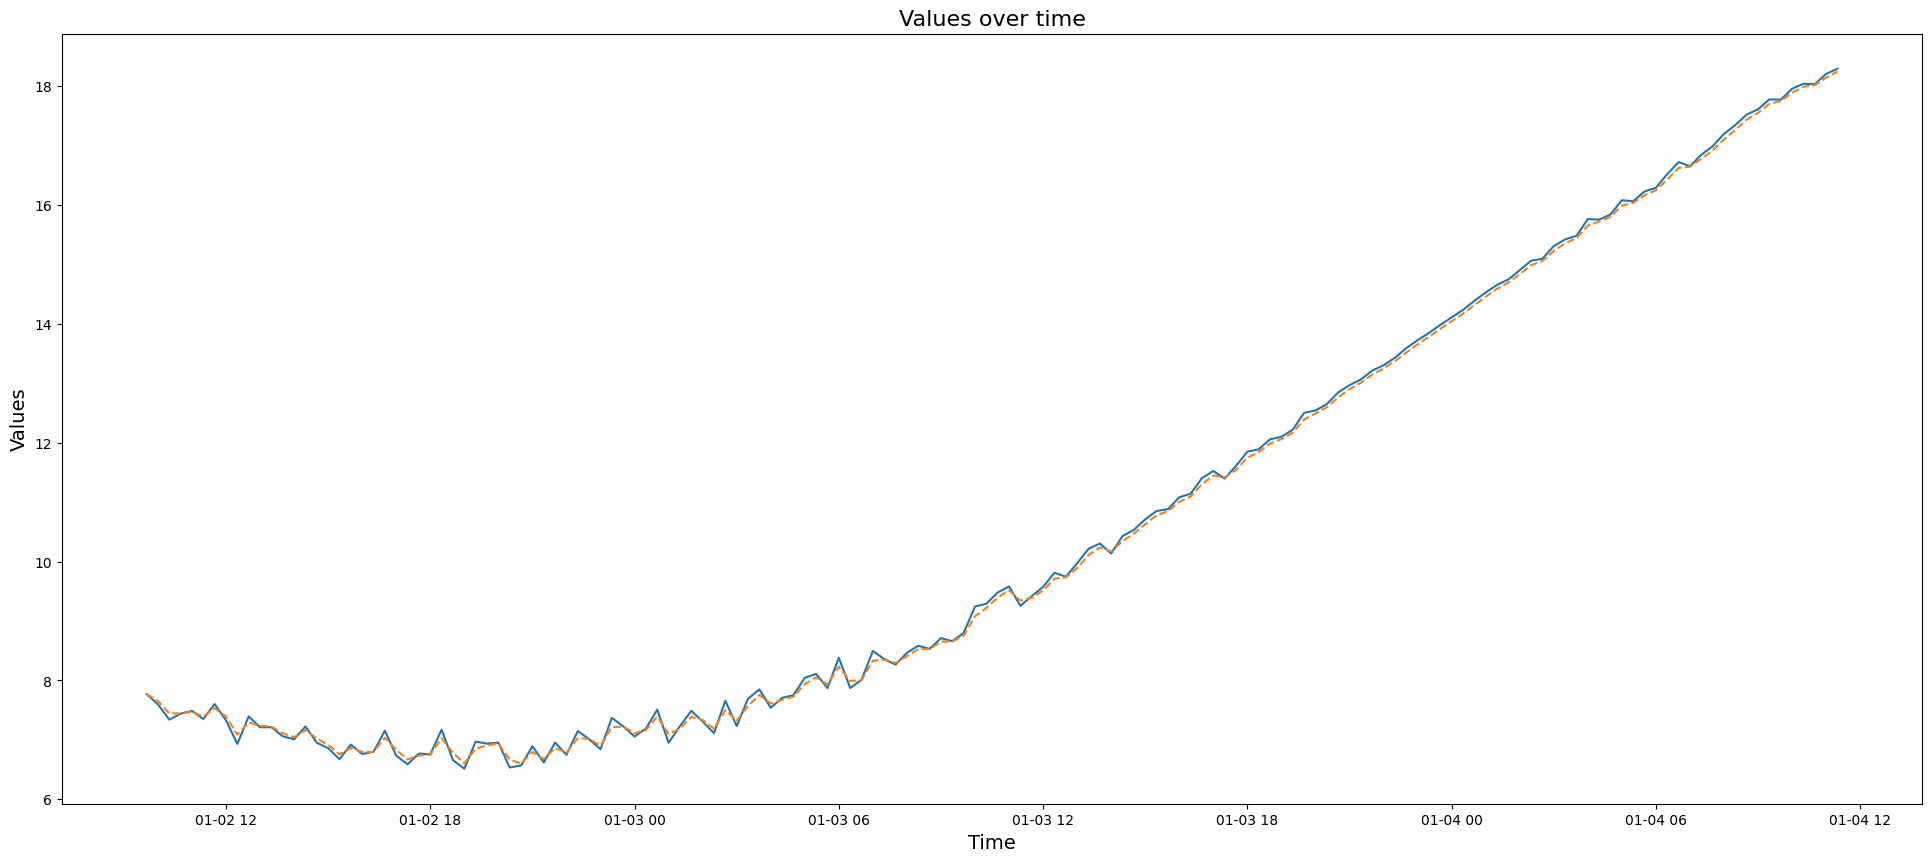

In [12]:
#define size
plt.figure(figsize=(24,10))
#add axes labels and a title
plt.ylabel('Values', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Values over time', fontsize=16)
plt.plot(ts.iloc[100:250], "-", label = 'ts')
plt.plot(ts.iloc[100:250].ewm(span=4,adjust=False).mean(),"--", label = 'ewm')